<a href="https://colab.research.google.com/github/hibatallahk/CarsPredictionML_NumedicalMethods/blob/main/practicumNumericalMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* I'm glad to say that you executed your project really well.
* Thank you for structuring the project. It's a pleasure to check such notebooks.
* There are a few tiny corrections which could help you to make your project even better.
* You've mastered internal method of categorical features encoding. Congratulations!
* Nothing can stop you now. Good luck next!

# Project description

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

# Data description



**Features**

- DateCrawled — date profile was downloaded from the database
- VehicleType — vehicle body type
- RegistrationYear — vehicle registration year
- Gearbox — gearbox type
- Power — power (hp)
- Model — vehicle model
- Mileage — mileage (measured in km due to dataset's regional specifics)
- RegistrationMonth — vehicle registration month
- FuelType — fuel type
- Brand — vehicle brand
- NotRepaired — vehicle repaired or not
- DateCreated — date of profile creation
- NumberOfPictures — number of vehicle pictures
- PostalCode — postal code of profile owner (user)
- LastSeen — date of the last activity of the user

**Target**

Price — price (Euro)

# Goal of the project

The main goal of this project is to predict the price of used cars, and analyse the quality and the speed of the prediction, and the time required for training.

# Table of Content

<div> 
    <ol>
      <li><a href="#1"> Data downloading</a></li>
      <li><a href="#2"> Data preparation</a></li>
      <li><a href="#3"> Exploratory Data Analysis</a></li> 
      <li><a href="#4">Model training</a></li>
      <li><a href="#5">Model analysis</a></li>
      <li><a href="#6">Overall conclusion</a></li>
    </ol> 
</div>

# <a id="1"> Data downloading

In [ ]:
!pip3 install CatBoost

In [ ]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import random

# import time for time computation
import time

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import module for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# import metric to measure quality of model
from sklearn.metrics import mean_squared_error

# import modules for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning models
from sklearn.linear_model import LinearRegression # import linear regression algorithm
from sklearn.ensemble import RandomForestRegressor # import random forest algorithm
from catboost import CatBoostRegressor, Pool # import catboost regressor
from lightgbm import LGBMRegressor # import lightgbm regressor
from xgboost import XGBRegressor # import xgboost regressor

from IPython.display import display

print('Libraries imported successfully!')

Libraries imported successfully!


<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

In [ ]:
# read the data
df = pd.read_csv('https://code.s3.yandex.net/datasets/car_data.csv')

In [ ]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [ ]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCo

None

----------------------------------------------------------------------------------------------------
Describe:



,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


----------------------------------------------------------------------------------------------------


,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,15470,8,2,250,7,40,2,109,18592
top,05/03/2016 14:25,sedan,manual,golf,petrol,volkswagen,no,03/04/2016 00:00,07/04/2016 07:16
freq,66,91457,268251,29232,216352,77013,247161,13719,654



Columns with nulls:
Column VehicleType has 10.5794% percent of Nulls, and 37490 of nulls
Column Gearbox has 5.5967% percent of Nulls, and 19833 of nulls
Column Model has 5.5606% percent of Nulls, and 19705 of nulls
Column FuelType has 9.2827% percent of Nulls, and 32895 of nulls
Column NotRepaired has 20.0791% percent of Nulls, and 71154 of nulls
There are 5 columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(354369, 16)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 262 duplicated rows.




**Conclusion**
- We see here that our data contains 354,369 rows and 16 columns
- 5 columns with missing values
- 262 duplicated rows

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well.
</div>

# <a id="2"> Data Preparation

## Renaming columns


In [ ]:
df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType': 'vehicle_type', 'RegistrationYear': 'registration_year', 'Gearbox': 'gearbox',
       'Power': 'power', 'Model': 'model', 'Mileage': 'mileage', 'RegistrationMonth': 'registration_month', 'FuelType': 'fuel_type', 'Brand': 'brand',
       'NotRepaired': 'not_repaired', 'DateCreated': 'date_created', 'NumberOfPictures': 'number_of_pictures', 'PostalCode': 'postal_code', 'LastSeen': 'last_seen'})

In [ ]:
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


## Handling NAs

**Missing Values**

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        # percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# check missing data
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
not_repaired,71154,20.1
vehicle_type,37490,10.6
fuel_type,32895,9.3
gearbox,19833,5.6
model,19705,5.6


- The missing values in the dataset are mostly missing at random (MAR).

- `not_repaired` has 20.1% missing values
- `vehicle_type`, `fuel_type`, `gearbox` and `model`: have less than 10% missing value
- we can drop missing values that are less than 10% , let's see how we can handle this

- This function is used to fill a missing value with a unique feature using the property of the data.

In [ ]:
# function to replace missing values
def replace_missing_value(unique_value_feature, col_to_replace):  
    """
    This function is used to replace missing value in a column
    using possible unique value feature for those missing values    
    """
    # get unique value of feature from this dataframe
    for value in df[unique_value_feature].unique().tolist():
        # get specific value of features using possible value from column value to replace
        specific_value_df = df[df[unique_value_feature] == value].dropna()[col_to_replace]    
        value_replacement_list = specific_value_df.unique().tolist()
        # for the missing value, assign a random choice of the replacement value for that unknown value
        if value_replacement_list != []:
            df.loc[(df[unique_value_feature] == value) & (df[col_to_replace] != df[col_to_replace]), col_to_replace] = random.choice(value_replacement_list)
        else:
            df.loc[(df[unique_value_feature] == value) & (df[col_to_replace] != df[col_to_replace]), col_to_replace] = df[col_to_replace].mode()

- **`model` feature**

The approach here is to 
- get a unique value of vehicle brand, 
- then get the list of specific brand with possible model for that brand. 
- then choose a random value from the list (excluding the nan values) and assign that to the missing model for that vehicle brand in the dataframe. 

For unique brand with an empty list, we use most frequent value in `model` column.

In [ ]:
replace_missing_value('brand', 'model')

- **`vehicle_type` feature**

- We get the unique values of vehicle model, 
- get the list of specific model with possible vehicle type for that model. 
- choose a random value from the list (excluding the nan values) and assign that to the missing `vehicle_type` for that vehicle model in the dataframe. 

For unique model with an empty list, we use the most frequent value in the `vehicle_type` column.

In [ ]:
replace_missing_value('model', 'vehicle_type')

- **`fuel_type` feature**

In [ ]:
# replace missing value in `fuel_type` column
replace_missing_value('model', 'fuel_type')

- **`gearbox` feature**

In [ ]:
# replace missing value in `gearbox` column
replace_missing_value('model', 'gearbox')

*********************************

- **`not_repaired` feature**

- The best for `not_repaired` features is to replace nan values with a new category

In [ ]:
df['not_repaired'].fillna('unknown', inplace=True)
df.not_repaired.value_counts()

no         247161
unknown     71154
yes         36054
Name: not_repaired, dtype: int64

- **checking missing after cleansing**

In [ ]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
model,3374,1.0
gearbox,1104,0.3
fuel_type,1104,0.3
vehicle_type,1042,0.3


In [ ]:
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,wagon,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,a1,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [ ]:
df[(df['model'].isnull())]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
59,29/03/2016 15:48,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,unknown,29/03/2016 00:00,0,53721,06/04/2016 01:44
306,21/03/2016 14:38,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,unknown,21/03/2016 00:00,0,6493,24/03/2016 02:47
431,20/03/2016 20:45,3950,small,2004,auto,5,NaN,70000,5,gasoline,sonstige_autos,no,20/03/2016 00:00,0,90562,03/04/2016 04:17
650,30/03/2016 11:55,15000,coupe,1971,NaN,0,NaN,5000,4,NaN,sonstige_autos,no,30/03/2016 00:00,0,51145,07/04/2016 02:45
661,01/04/2016 15:56,9900,suv,2000,auto,250,NaN,150000,4,lpg,sonstige_autos,no,01/04/2016 00:00,0,17309,07/04/2016 14:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354062,19/03/2016 11:25,6000,small,2008,manual,155,NaN,150000,5,petrol,sonstige_autos,no,19/03/2016 00:00,0,63069,07/04/2016 00:46
354073,19/03/2016 14:53,1750,NaN,1995,NaN,0,NaN,100000,12,NaN,sonstige_autos,unknown,19/03/2016 00:00,0,6188,01/04/2016 01:47
354083,30/03/2016 07:54,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,unknown,30/03/2016 00:00,0,6686,06/04/2016 23:46
354321,15/03/2016 13:52,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,15/03/2016 00:00,0,91186,17/03/2016 08:16


In [ ]:
# dataframe with missing value
df[(df['model'].isnull()) & (df['brand'] == 'sonstige_autos')]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
59,29/03/2016 15:48,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,unknown,29/03/2016 00:00,0,53721,06/04/2016 01:44
306,21/03/2016 14:38,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,unknown,21/03/2016 00:00,0,6493,24/03/2016 02:47
431,20/03/2016 20:45,3950,small,2004,auto,5,NaN,70000,5,gasoline,sonstige_autos,no,20/03/2016 00:00,0,90562,03/04/2016 04:17
650,30/03/2016 11:55,15000,coupe,1971,NaN,0,NaN,5000,4,NaN,sonstige_autos,no,30/03/2016 00:00,0,51145,07/04/2016 02:45
661,01/04/2016 15:56,9900,suv,2000,auto,250,NaN,150000,4,lpg,sonstige_autos,no,01/04/2016 00:00,0,17309,07/04/2016 14:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354062,19/03/2016 11:25,6000,small,2008,manual,155,NaN,150000,5,petrol,sonstige_autos,no,19/03/2016 00:00,0,63069,07/04/2016 00:46
354073,19/03/2016 14:53,1750,NaN,1995,NaN,0,NaN,100000,12,NaN,sonstige_autos,unknown,19/03/2016 00:00,0,6188,01/04/2016 01:47
354083,30/03/2016 07:54,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,unknown,30/03/2016 00:00,0,6686,06/04/2016 23:46
354321,15/03/2016 13:52,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,15/03/2016 00:00,0,91186,17/03/2016 08:16


- We see that we still have missing values
- we can see from the df that the type of remaining nas is MNAR. 
- dropping rows with missing may introduce bias in the dataset. 
- a quick check here is showing us that there is NAs in `sonstige_autos` brand. 

Replacing missing with a new value rather than dropping data in this column will allow us to process the column in our further analysis without loosing data.

In [ ]:
# replace 'NaN' in the new dataframe with 'unknown'
df.fillna(value='unknown', inplace=True)

In [ ]:
#check for missing value
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<div class="alert alert-block alert-success">
<b>Success:</b> Missing values were filled in the right way. Great that you've used values of other features.
</div>

## Handling duplicates

- We drop duplicated rows:

In [ ]:
n_duplicated = df.duplicated().sum()

df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

<div class="alert alert-block alert-info">
<b>Improve: </b> Please print "n_duplicated".
</div>

## Changing Datatypes


In [ ]:
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
change_datatype(df, ['date_crawled', 'date_created', 'last_seen'], 'datetime64[ns]')
change_datatype(df, ['price', 'registration_year', 'power', 'registration_month', 'number_of_pictures'], 'int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354103 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354103 non-null  datetime64[ns]
 1   price               354103 non-null  int32         
 2   vehicle_type        354103 non-null  object        
 3   registration_year   354103 non-null  int32         
 4   gearbox             354103 non-null  object        
 5   power               354103 non-null  int32         
 6   model               354103 non-null  object        
 7   mileage             354103 non-null  int64         
 8   registration_month  354103 non-null  int32         
 9   fuel_type           354103 non-null  object        
 10  brand               354103 non-null  object        
 11  not_repaired        354103 non-null  object        
 12  date_created        354103 non-null  datetime64[ns]
 13  number_of_pictures  354103 no

# <a id="3"> Exploratory Data Analysis (EDA)

- Adding a new column age of the vehicle

In [ ]:
df['age'] = df['date_created'].dt.year - df['registration_year']
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,age
0,2016-03-24 11:52:00,480,wagon,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-07-04 03:16:00,23
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,a1,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-07-04 01:46:00,5
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-05-04 12:47:00,12
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00,15
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-06-04 10:17:00,8


********************************

**Checking correlation**

In [ ]:
def corr_matrix(df, label):
    plt.figure(figsize=(7,7))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Correlation matrix for ' + label)
    plt.show()
    
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # create grouped data
    data = df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(12,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);

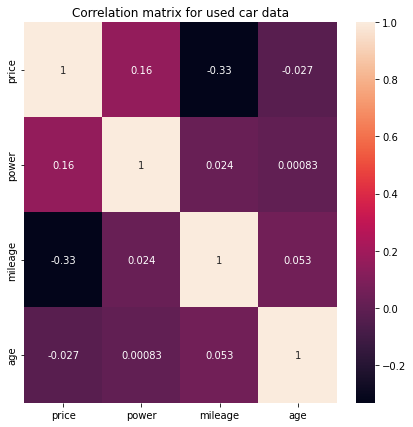

In [ ]:
# correlation matrix
corr_df = df[['price', 'power', 'mileage', 'age']]
corr_matrix(corr_df, 'used car data')

- From the correlation matrix we can see that a little or no correlation among those variables.

- histogram of selected variables

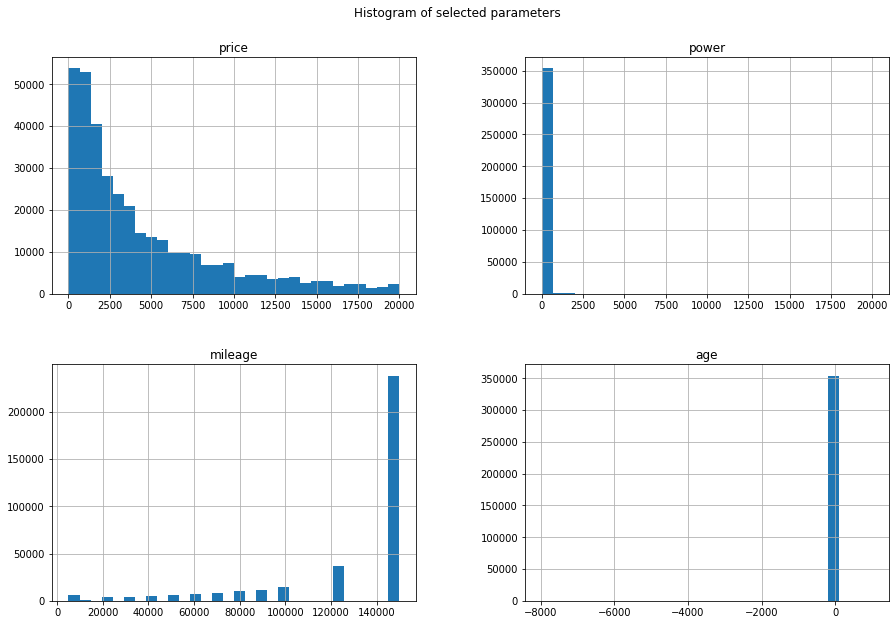

In [ ]:
df[['price', 'power', 'mileage', 'age']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters', y=0.95);

From the Histograms we can say that:
- most of the cars `price` are between 0 to 7500 e
- most of cars have `mileage` > than 80,000 miles
- we have some cars `age` that are negatives. 
- we should remove outliers.

**numerical vs categorical variables**

In [ ]:
num_list = []
cat_list = []
plot_data = df[['price', 'vehicle_type', 'gearbox', 'power', 'mileage', 'fuel_type', 'brand', 'not_repaired', 'age']]

for column in plot_data:
    if is_numeric_dtype(plot_data[column]):
        num_list.append(column)
    elif is_string_dtype(plot_data[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

['price', 'power', 'mileage', 'age']
['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'not_repaired']


- create histogram and bar chart

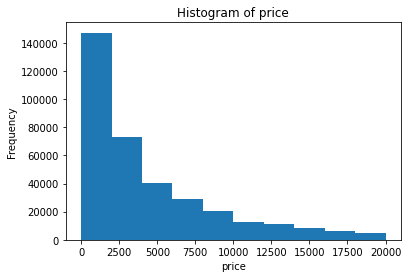

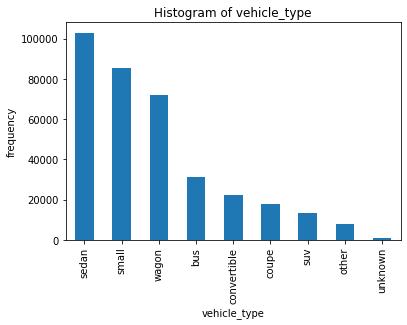

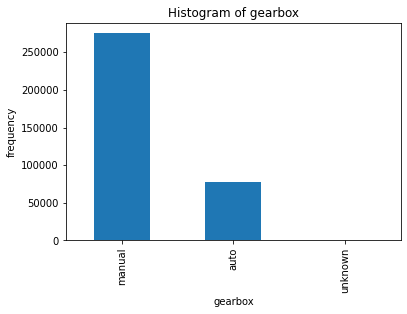

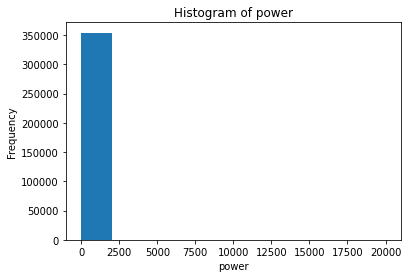

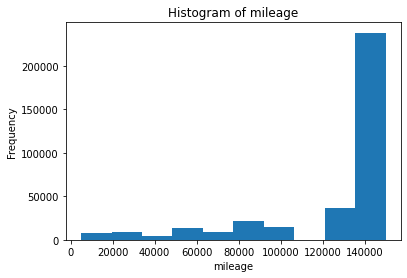

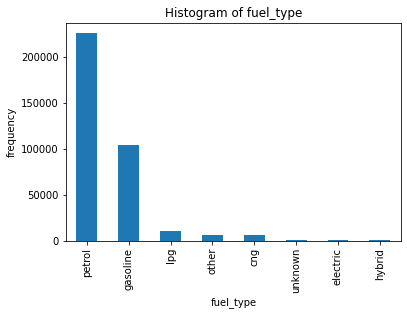

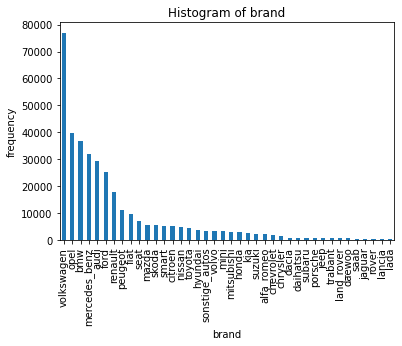

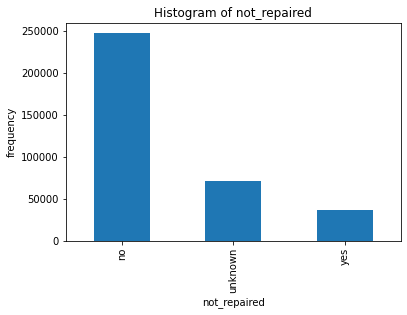

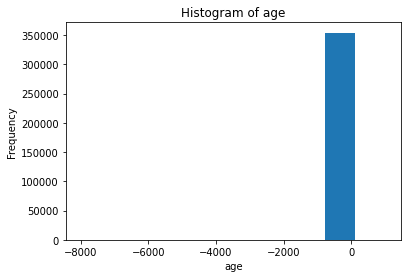

In [ ]:
for column in plot_data:
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.title('Histogram of ' + column)
    if is_numeric_dtype(plot_data[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(plot_data[column]):
        df[column].value_counts().plot(kind = 'bar')

- We can see that:
  - in `age`: an anomaly in the histogram, negative values of age.

- Top selling brands:


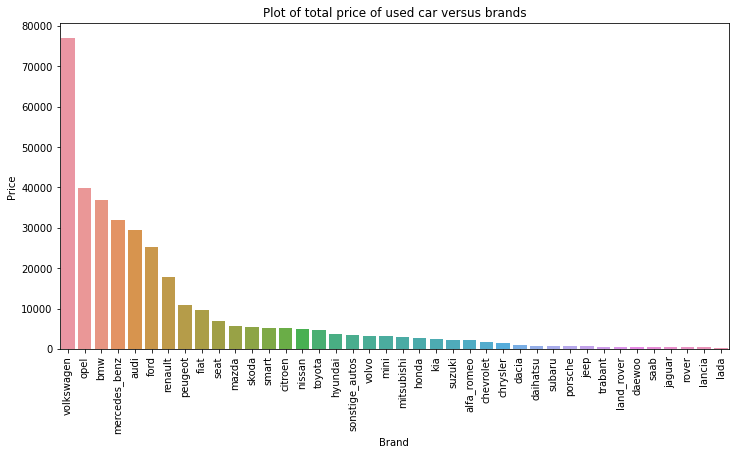

In [ ]:
plot_snsbar(df, 'brand', 'price', 'Plot of total price of used car versus brands')

- we can see that the top 10 selling brands in terms of price are 
    - volkswagen, opel, bmw, mercedes benz, audi, ford, renault, peugeot, fiat and seat
- The most sold vehicle_type is the *sedan* 
- the *manual* gearbox is the most represented amongst vehicles sold. 
- more cars which are not repaired are represented in the dataset. 
- Most of sold cars use petrol or gasoline.

<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see that you've visualized correlations, distributions and made analysis.
</div>

## Handling Outliers

Our approach to handle outliers is to:
- filter the data for vehicle power less than 2,039 hp (the highest horsepower car is the Aspark Owl at 2,039 hp)

- filter the age features that are negative. 

In [ ]:
df_filtered = df[(df['power'] <= 2039) & (df['age'] >= 0)]
print(f'The shape of the new dataset is: {df_filtered.shape}')
print()
df_filtered.describe()

The shape of the new dataset is: (339476, 17)



,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code,age
count,339476.000000,339476.000000,339476.000000,339476.000000,339476.000000,339476.0,339476.000000,339476.000000
mean,4470.792436,2002.322618,108.435960,128066.593809,5.754802,0.0,50604.920280,13.677303
std,4546.341515,13.952577,72.160335,37926.588036,3.708776,0.0,25808.091058,13.952588
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,0.000000
25%,1099.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30169.000000,9.000000
50%,2799.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49492.000000,13.000000
75%,6500.000000,2007.000000,143.000000,150000.000000,9.000000,0.0,71229.000000,17.000000
max,20000.000000,2016.000000,2018.000000,150000.000000,12.000000,0.0,99998.000000,1016.000000


- Now the data is ready for model training

<div class="alert alert-block alert-info">
<b>Improve: </b> What about registration year = 1000, power = 0, registration_month = 0, ...?
</div>

# <a id="3"> Model training


- Drop unimportant features

In [ ]:
car_df = df_filtered.drop(['date_crawled', 'registration_year', 'registration_month', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen'], axis=1)

# target and features
y = car_df.price
X = car_df.drop(['price'], axis=1)

# 75% training and 25% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

<div class="alert alert-block alert-success">
<b>Success:</b> I agree that we don't need dates, constant feature and postal code.
</div>

### Check to see effect of cardinality on Categorical Variables


- Let's begin by training different models with various hyperparameters. 
- We will compare gradient boosting methods with:
    - Random Forest, 
    - Decision Tree, 
    - Linear Regression. 
- We will use RMSE metric evaluate the models.

In [ ]:
# categorical columns with relatively low cardinality
low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train[cname].dtype == 'object']

# numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'int32']]

# keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
features_train = X_train[my_cols].copy()
features_test = X_test[my_cols].copy()

# list of categorical variables
s = (features_train.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorical variables:')
print(object_cols)

Categorical variables:
['vehicle_type', 'gearbox', 'fuel_type', 'not_repaired']


- **Comparing different approaches**

In [ ]:
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

- Approach 1: Ordinal Encoding:

In [ ]:
%%time
# make a copy to avoid changing original data
label_X_train = features_train.copy()
label_X_test = features_test.copy()

# apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(features_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(features_test[object_cols])

print('RMSE from Approach 1: Ordinal Encoding')
print(score_dataset(label_X_train, label_X_test, y_train, y_test))

RMSE from Approach 1: Ordinal Encoding
1943.9330376245562
CPU times: user 49.5 s, sys: 1.12 s, total: 50.6 s
Wall time: 50.4 s


- Approach 2: One-Hot Encoding

In [ ]:
%%time

# apply one-hot encoding to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(
    OH_encoder.fit_transform(features_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(features_test[object_cols]))

# One-Hot encoding removed index; put it back
OH_cols_train.index = features_train.index
OH_cols_test.index = features_test.index

# remove categorical columns (will replace with one-hot encoding)
num_X_train = features_train.drop(object_cols, axis=1)
num_X_test = features_test.drop(object_cols, axis=1)

# add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

print('RMSE from Approach 2: One-Hot Encoding')
print(score_dataset(OH_X_train, OH_X_test, y_train, y_test))

RMSE from Approach 2: One-Hot Encoding
1938.6305638511376
CPU times: user 1min 29s, sys: 500 ms, total: 1min 30s
Wall time: 1min 29s


- One-Hot encoding seems to be the best approach (lowest RMSE score), but we have the RMSE score for both approaches are so close.

## Linear Regression for sanity check

In [ ]:
# one-hot encoding of categorical features
car_df_ohe = pd.get_dummies(car_df, drop_first=True)

# declare variables for target and features
y_ohe = car_df_ohe.price
X_ohe = car_df_ohe.drop(['price'], axis=1)

# split data into 75% training and 25% testing sets
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=12345)

# numerical features
numerical_cols = [cname for cname in X_train_ohe.columns if X_train_ohe[cname].dtype in ['int64', 'int32']]

# features scaling
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical_cols])
# transform the training set and the test set using transform()
X_train_ohe[numerical_cols] = scaler.transform(X_train_ohe[numerical_cols])
X_test_ohe[numerical_cols]  = scaler.transform(X_test_ohe[numerical_cols])

<div class="alert alert-block alert-success">
<b>Success:</b> Great that scaler was fitted only on train part.
</div>

In [ ]:
%%time
# linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_ohe, y_train_ohe)
lr_pred = lr_model.predict(X_test_ohe)

# rmse for linear model
lr_rmse = np.sqrt(mean_squared_error(y_test_ohe, lr_pred))
print("\033[1m" + 'RMSE using Linear Regression' + "\033[0m")
print('RMSE: {:.3f}'.format(lr_rmse))

RMSE using Linear Regression
RMSE: 3060.063
CPU times: user 8.44 s, sys: 858 ms, total: 9.29 s
Wall time: 5.18 s


## Random Forest Regressor

In [ ]:
# declare variables for target and features
y_le = car_df.price
X_le = car_df.drop(['price'], axis=1)

# split data into 75% training and 25% testing sets
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.25, random_state=12345)

# make a copy to avoid changing original data
label__X_train = X_train_le.copy()
label__X_test = X_test_le.copy()

# categorical features
categorical_cols = [cname for cname in X_train_le.columns if X_train_le[cname].dtype == 'object']

In [ ]:
# apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label__X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train_le[categorical_cols])

In [ ]:
label__X_test[categorical_cols] = ordinal_encoder.transform(X_test_le[categorical_cols])

In [ ]:
%%time
# hyperparameter optimization

# define hyperparameters to tune
grid = {
    "n_estimators" : [10, 25, 50],
    "max_depth" : [None, 2, 4, 8],
    "min_samples_leaf" : [2, 4, 6]
}
# define the model 
regressor = RandomForestRegressor(random_state = 12345)
# define the grid search
grid_search_rf = GridSearchCV(estimator = regressor, param_grid = grid, scoring="neg_mean_squared_error", cv=5)
# execute search
grid_search_rf.fit(label__X_train, y_train_le)
# summarize result
print('The best hyperparameters are: {}'.format(grid_search_rf.best_params_))

The best hyperparameters are: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 50}
CPU times: user 21min 34s, sys: 4.02 s, total: 21min 38s
Wall time: 21min 33s


<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see that cross-validation based method with our target function was used for parameters tuning.
</div>

In [ ]:
# create the random forest regressor model
def random_forest_regressor(X_train, y_train, X_test, y_test):
    """
    This is a random forest regressor function developed to train
    the model, make prediction on testing dataset, 
    and compute evaluation metrics for testing datasets
    """
    # build the model
    model = RandomForestRegressor(**grid_search_rf.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on testing set
    y_pred = model.predict(X_test)
    # compute RMSE for random forest    
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
%%time
# determine RMSE for random forest regressor
print("\033[1m" + 'RMSE using Random Forest Regressor' + "\033[0m")
random_forest_regressor(label__X_train, y_train_le, label__X_test, y_test_le)

RMSE using Random Forest Regressor
RMSE: 1720.432
CPU times: user 34 s, sys: 55 ms, total: 34 s
Wall time: 33.9 s


## CatBoost Regressor

- For CatBoost, we create a separate dataset without encoding.
- then, CatBoost encodes the categorical features, 
- We can tune hyperparameters learning_rate, depth, and 12_leaf_reg and apply a grid search across the train set.
- then, we fit the training set to make predictions on the test set.

In [ ]:
# declare variables for target and features
y_cb = car_df.price
X_cb = car_df.drop(['price'], axis=1)

# split data into 75% training and 25% testing sets
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.25, random_state=12345)

cat_features = [
    'vehicle_type', 
    'gearbox', 
    'model', 
    'fuel_type', 
    'brand', 
    'not_repaired'
]

In [ ]:
%%time
# hyperparameter optimization

# define hyperparameters to tune
grid = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6],
        'l2_leaf_reg': [1, 3, 5]
       }
# define the model 
cb_regr = CatBoostRegressor(
    iterations=50,
    cat_features=cat_features,
    logging_level = 'Silent',
    loss_function='RMSE',
    early_stopping_rounds = 50,
    random_state = 12345)
# define the grid search
grid_search_cb = GridSearchCV(estimator = cb_regr, param_grid = grid, scoring="neg_mean_squared_error", cv=3)
# execute search
grid_search_cb.fit(X_train_cb, y_train_cb)
# summarize result
print('The best hyperparameters are: {}'.format(grid_search_cb.best_params_))

The best hyperparameters are: {'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.5}
CPU times: user 4min 9s, sys: 3.6 s, total: 4min 12s
Wall time: 2min 20s


<div class="alert alert-block alert-success">
<b>Success:</b> Right that internal method of categorical features encoding was used.
</div>

In [ ]:
# create the CatBoost regressor model
def catboost_regressor(X_train, y_train, X_test, y_test):
    """
    This is a catboost regressor function developed to train
    the model, make prediction on train and testing dataset, 
    and compute evaluation metrics for testing datasets
    """
    # define model
    model = CatBoostRegressor(**grid_search_cb.best_params_)
    model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=False, plot=False) # train the model 
    # make predictions on train set
    y_pred = model.predict(X_test)
    # compute RMSE for catboost regression 
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print()
    # feature importance from CatBoost regression 
    sorted_feature_importance = model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_cb.columns[sorted_feature_importance], 
             model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("CatBoost Feature Importance")

RMSE using CatBoost Regressor
RMSE: 1708.513

CPU times: user 6min 46s, sys: 6.09 s, total: 6min 52s
Wall time: 3min 32s


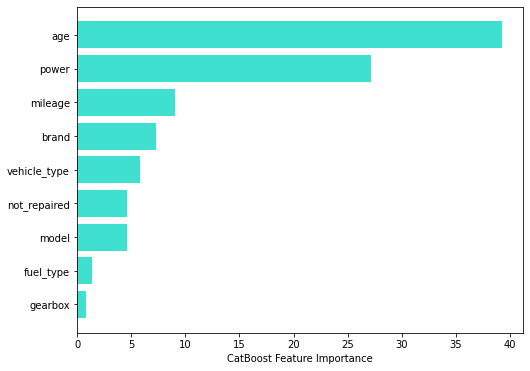

In [ ]:
%%time
# determine RMSE for catboost regressor
print("\033[1m" + 'RMSE using CatBoost Regressor' + "\033[0m")
catboost_regressor(X_train_cb, y_train_cb, X_test_cb, y_test_cb)

## LightGBM with hyperparameter tuning


- We create a separate dataset without any encoding. 
- The LightLGBM model will encode the categorical features.
- we tune the hyperparameters, and use small num_leaves to deal with overfitting

In [ ]:
# declare variables for target and features
y_le = car_df.price
X_le = car_df.drop(['price'], axis=1)

# split data into 75% training and 25% testing sets
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.25, random_state=12345)

# make a copy to avoid changing original data
label__X_train = X_train_le.copy()
label__X_test = X_test_le.copy()

# categorical features
categorical_cols = [cname for cname in X_train_le.columns if X_train_le[cname].dtype == 'object']

# apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label__X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train_le[categorical_cols])
label__X_test[categorical_cols] = ordinal_encoder.transform(X_test_le[categorical_cols])

In [ ]:
%%time
# hyperparameter optimization for LightGBM regression

# define hyperparameters to tune
lgbm_grid = {'learning_rate': [0.001, 0.01, 0.05, 0.1],
             'n_estimators': [50],
             'num_leaves': [5, 10, 20]
            }
# define the model 
lgbm_regr = LGBMRegressor(random_state = 12345)

# define the grid search
grid_search_lgbm = GridSearchCV(
    estimator = lgbm_regr, 
    param_grid = lgbm_grid, 
    scoring = "neg_mean_squared_error", 
    cv = 3, 
    n_jobs = 1
)
# execute search
grid_search_lgbm.fit(label__X_train, y_train_le)
# summarize result
print('The best hyperparameters are: {}'.format(grid_search_lgbm.best_params_))

The best hyperparameters are: {'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 20}
CPU times: user 43.2 s, sys: 382 ms, total: 43.6 s
Wall time: 22.6 s


<div class="alert alert-block alert-info">

<b>Improve: </b> LightGBM also has internal method. Just change type of categorical features: `.astype('category')`
</div>

In [ ]:
# create the LightGBM regressor model
def lightGBM_regressor(X_train, y_train, X_test, y_test):
    """
    This is a lightGBM regressor function developed to train
    the model, make prediction on train and testing dataset, 
    and compute evaluation metrics for testing datasets
    """
    # define model
    model = LGBMRegressor(**grid_search_lgbm.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    y_pred = model.predict(X_test)
    # compute RMSE for LGBM regressor    
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print()
    # feature importance from LightGBM regression 
    sorted_feature_importance = model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_le.columns[sorted_feature_importance], 
             model.feature_importances_[sorted_feature_importance], 
             color='dodgerblue')
    plt.xlabel("LightGBM Feature Importance")

RMSE using LightGBM Regressor
RMSE: 1964.119

CPU times: user 1.9 s, sys: 8.99 ms, total: 1.91 s
Wall time: 1.01 s


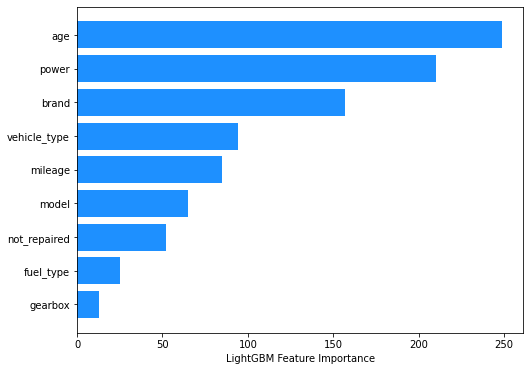

In [ ]:
%%time
# determine RMSE for lightGBM regressor
print("\033[1m" + 'RMSE using LightGBM Regressor' + "\033[0m")
lightGBM_regressor(label__X_train, y_train_le, label__X_test, y_test_le)

**Conclusion**

- In this section, we used:
  - Random Forest Regressor to test the cardinality on the categorical variables. 
  - We've compared both approaches (without considering any other model), One Hot Encoding and Label encoding and found that the best approach is one-hot encoding since it gave the lowest RSME score( but still both approaches are close). 
  - We trained different algorithms with different hyperparameters, in order to compare different gradient boosting methods with random forest, decision tree and linear regression. 
  - We trained a Linear Regression Model for sanity check, Random Forest Regressor, Catboost Regressor, and LightGBM Regressor. 
  - We tuned different hyperparameters that influences the performance of the models. 
  - We observed the time to tune hyperparameters and train the model. 
  - The metric we used to evaluate the model is the RMSE score.

<div class="alert alert-block alert-success">
<b>Success:</b> This part was done well. Good job!
</div>

# <a id="4"> Model analysis

- We are analyzing and assessing in this section the quality of the trained models. 
- Models' summary, RMSE, the time for hyperparameters tuning and model training

**And this is a summary of our results**

|**Models**| **Time required to tune hyperparameters**  | **Time required to train model**  | **RMSE score**  |
|---|---|---|---|
| Linear Regression	| - | 5.05 sec | 3081.710 |
| Random Forest Regressor | 1289 sec | 33.8 sec | 1713.992 |
| CatBoost Regressor | 140 sec | 211 sec | 1716.704 |
| LightGBM Regressor | 29.9 sec | 1.4 sec | 1969.816 |

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if you've measured time for training and predicting separetaly. Usually second one is more important. Time of parameters tuning do not make sense because it depends on range of parameters.
</div>

**Conclusion**

We can conclude that:
- Linear regression has the highest(worst) RMSE score of 3081.710, which means the worst which is expected 
- LightGBM Regressor has a relatively high score of RMSE, but take much less time to tune the hyperparams and to train.
- Random Forest Regressor has the best RMSE score of 1713.992, but took 1289 sec to tune the hyperparameters.
- CatBoost Regressor has an RMSE score of 1716.70, which is close to the Random Forest RMSE score, but took less time to tune the hyperparams 

To sum up:

- In terms of speed of prediction, the LightGBM is the best. 
- In terms of RMSE score, Random Forest Regressor is the best.
- When taking in consideration both parameters, the CatBoost Regressor seems to fit the best.


# <a id="5"> Overall Conclusion


The business task of this project is to predict the price of cars.

- In the first section, we loaded the data and began the preparation:
  - by renaming the column & checking for missing values 
  - we had 5 columns with missing values
  - We handled the missing values by filling with unique properties of the data. 
  - We proceeded after that to duplicates, we duplicated data by dropping it
  - we coverted the data to the correct datatypes
  - we after that added a new column `age` (the vehicle's age). 
- In the next section we carried out EDA part and checked for anomalies and outliers in the data. 
  - We had anomalies in `power` and `age` features
  - we removed anomalies and filtered the data
- In the model preparation section, 
  - we tested the effect of cardinality on the categorical variables using the Random Forest Regressor. 
  - we've seen that the best approach to is one-hot encoding since it gave the lowest RSME score (noting that there is no big difference between RMSE scores of both approaches). 
  - After that, we trained different algorithms with various hyperparameters, in order to compare different gradient boosting methods with Random forest, Decision tree and Linear regression. 
    - We trained a Linear Regression model for sanity check, 
    - Random forest regressor, 
    - Catboost regressor, 
    - LightGBM regressor. 
  - We also tuned different hyperparameters. The metric used to evaluate the model is RMSE score.

- In the last section of model analysis and quality assesment, we've seen that the lowest the RMSE is, with the lowest prediction and hyperparams tuning time, the best the model is. 
  - we observed that CatBoost Regressor has an RMSE score of 1716.70, which is close to the Random Forest RMSE score, but took less time to tune the hyperparams. So is relatively the best in this case.

<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see well-structured conclusion at the end of the project!
</div>